In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
def row_transform(image, pixel_size, name=False):
    """
    Kiszámolja a kép soronkénti DFT-jét és ábrázol.
    """
    # arrayek létrehozása 
    fft_size = (image.shape[0], int((image.shape[1] / 2) + 1))
    imag_unit = 0 + 0j
    fft_matrix = np.zeros(fft_size) * imag_unit
    freq_matrix = np.zeros(fft_size)
    
    # DFT számolás
    for i in range(image.shape[0]):
        fft_matrix[i] = np.fft.rfft(image[i] - image[i].mean())
        freq_matrix[i] = np.fft.rfftfreq(image.shape[1], d=pixel_size)
    
    # ábrázolás
    plt.figure(figsize=(10,13))
    
    plt.pcolormesh(abs(fft_matrix[: , 1:]))
    
    plt.ylim(fft_matrix.shape[0], 0)
    
    plt.xticks(np.linspace(1,fft_matrix.shape[1]-1,5), np.round_(np.linspace(freq_matrix[0][1]  *1e-7, freq_matrix[0][-1]  *1e-7, 5), decimals=2), fontsize=22)
    plt.yticks(fontsize=22)
    
    plt.xlabel(r'Frekvencia [1/m $ \cdot 10^7$]', fontsize=27)
    plt.ylabel("Sor száma", fontsize=27)

    cbar = plt.colorbar()
    cbar.set_label("Intenzitás", fontsize=27)
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize(20)
    
    # mentés
    if (name != False):
        plt.savefig("../latex/images/" + name + ".png", dpi=300)




            
def analize_row(image, row, pixel_size, Afreq=False, name=False, micron=False):
    """
    A megadott sorra jellemző hullámhossz megállapítását teszi lehetővé kiegészítő függvények segítségével. Utoljára az ábrázoláshoz használtam.
    """
    # arrayek létrehozása
    y = image[row, :]
    x = np.linspace(1, len(y), len(y))    
    
    # sor Fourier transzformáltja
    fft = np.fft.rfft(image[row] - image[row].mean())
    freq = np.fft.rfftfreq(image.shape[1], d=pixel_size)
    
    # ábrázolás
    plt.figure(figsize=(20,10))
    
    # ezt csak az adatfeldolgozáshoz használtam, de nem lesz tőle szép az ábra
    #plt.plot(x, y.mean() + (y.mean()/10)* np.sin(pixel_size*Afreq * x), color="red")
    
    plt.plot(x,y)
       
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    
    plt.xlabel(r'x [$\mu$m]', fontsize=27)
    plt.ylabel(r'z [ ]', fontsize=27)

    # mentés
    if (name != False):
        plt.savefig("../latex/images/" + name + "_1.png", dpi=300)
        
        
    # az ábra valódi méreteinek prezentálásához szükséges paraméterek
    height = int(image.shape[1] / 100 * 85)
    height2 = int(image.shape[1] / 100 * 15)
    percent = 0.3
    length = percent * image.shape[0] * pixel_size * 1e6
    
    if (micron != False):
        percent = micron / (image.shape[0] * PIXEL_SIZE * 1e6)
        length = micron
    
    
    # második ábra
    plt.figure(figsize=(20,10))

    plt.imshow(image, cmap="gray")
    plt.axhline(row, color="orange", linewidth=5)
    
    # ezt csak az adatfeldolgozáshoz használtam, de nem lesz tőle szép az ábra
    #plt.plot(x, row + (row/10) * np.sin(pixel_size * Afreq * x), color="red", linewidth=5)

    plt.tick_params(left=False,
        bottom=False,
        labelleft=False,
        labelbottom=False)
    
    # az ábrára jellemző mikrométeres szakasz felhelyezése a nagyságrendek bemutatására
    if (micron == False):
        if ((row / len(y)) > 0.8):
            plt.axhline(height2, 0.1, 0.4, linewidth=10, color="k", label=r'$\bf{%.1f \;\; \mu m}$' % length)
            leg = plt.legend(loc='upper left', framealpha=0, fontsize=26)
            for lh in leg.legendHandles: 
                lh.set_alpha(0)
        if ((row / len(y)) < 0.8):
            plt.axhline(height, 0.1, 0.4, linewidth=10, color="k", label=r'$\bf{%.1f \;\; \mu m}$' % length)
            leg = plt.legend(loc='lower left', framealpha=0, fontsize=26)
            for lh in leg.legendHandles: 
                lh.set_alpha(0)
    if (micron != False):
        if ((row / len(y)) > 0.8):
            plt.axhline(height2, 0.1, percent + 0.1, linewidth=10, color="k", label=r'$\bf{%d \;\; \mu m}$' % length)
            leg = plt.legend(loc='upper left', framealpha=0, fontsize=26)
            for lh in leg.legendHandles: 
                lh.set_alpha(0)
        if ((row / len(y)) < 0.8):
            plt.axhline(height, 0.1, percent + 0.1, linewidth=10, color="k", label=r'$\bf{%d \;\; \mu m}$' % length)
            leg = plt.legend(loc='lower left', framealpha=0, fontsize=26)
            for lh in leg.legendHandles: 
                lh.set_alpha(0)

    # mentés
    if (name != False):
        plt.savefig("../latex/images/" + name + "_2.png", dpi=300)

        

    # harmadik ábra
    plt.figure(figsize=(20,10))
    
    plt.plot(freq, abs(fft))
    plt.axvline(Afreq, color="red", label="Kiválasztott frekvencia")

    plt.grid()
    
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    plt.xlabel("Frequency", fontsize=27)
    plt.ylabel("Amplitude", fontsize=27)
    
    plt.legend(fontsize=25)
    
    # mentés
    if (name != False):
        plt.savefig("../latex/images/" + name + "_3.png", dpi=300)

## Mélység analízis

(669, 128)


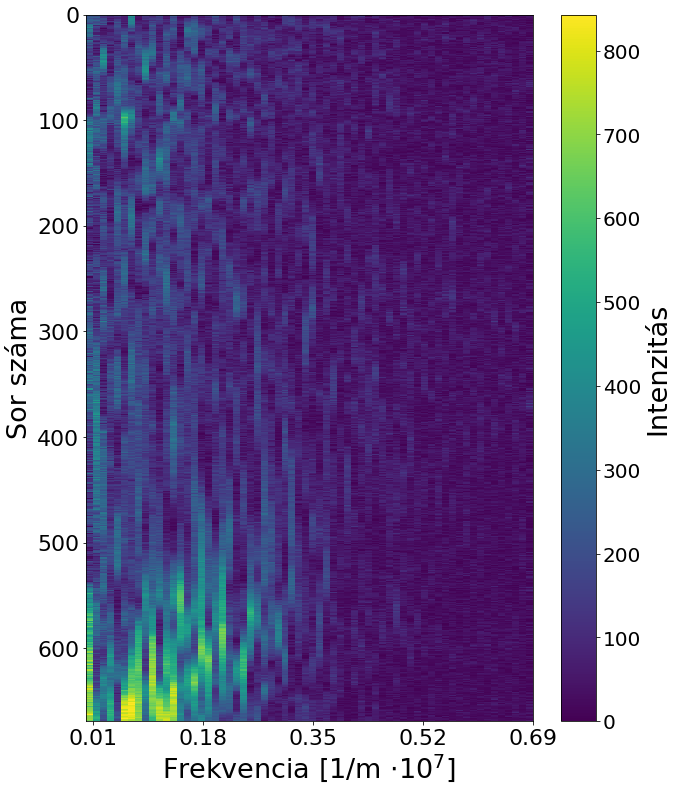

In [3]:
image = imageio.imread('../data/PD01_Cu_pillar/20220406/selected_data/68_deep_30na5z.tif')
print(image.shape)

#plt.figure(figsize=(20,10))
#plt.imshow(image, cmap="gray")
PIXEL_SIZE = 7.28516e-008

row_transform(image, PIXEL_SIZE, name="68_deep_30na5z")

(433, 128)


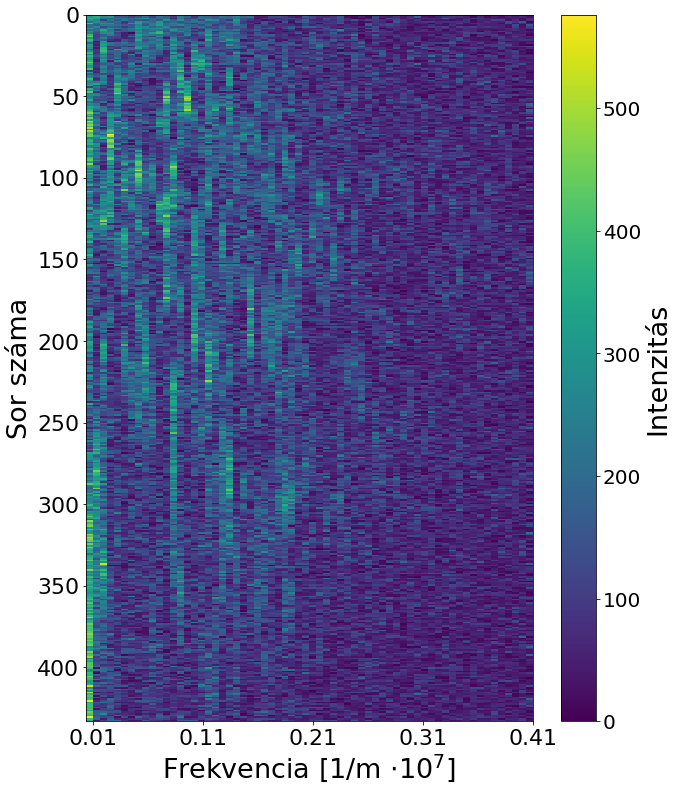

In [4]:
image = imageio.imread('../data/PD01_Cu_pillar/20220406/selected_data/84_deep_15na1z.tif')
print(image.shape)

#plt.figure(figsize=(20,10))
#plt.imshow(image, cmap="gray")
PIXEL_SIZE = 1.21419e-007

row_transform(image, PIXEL_SIZE, name="84_deep_15na1z")

## Sor analízis

In [5]:
freqs = np.zeros(8)
ticks = []

(427, 427)


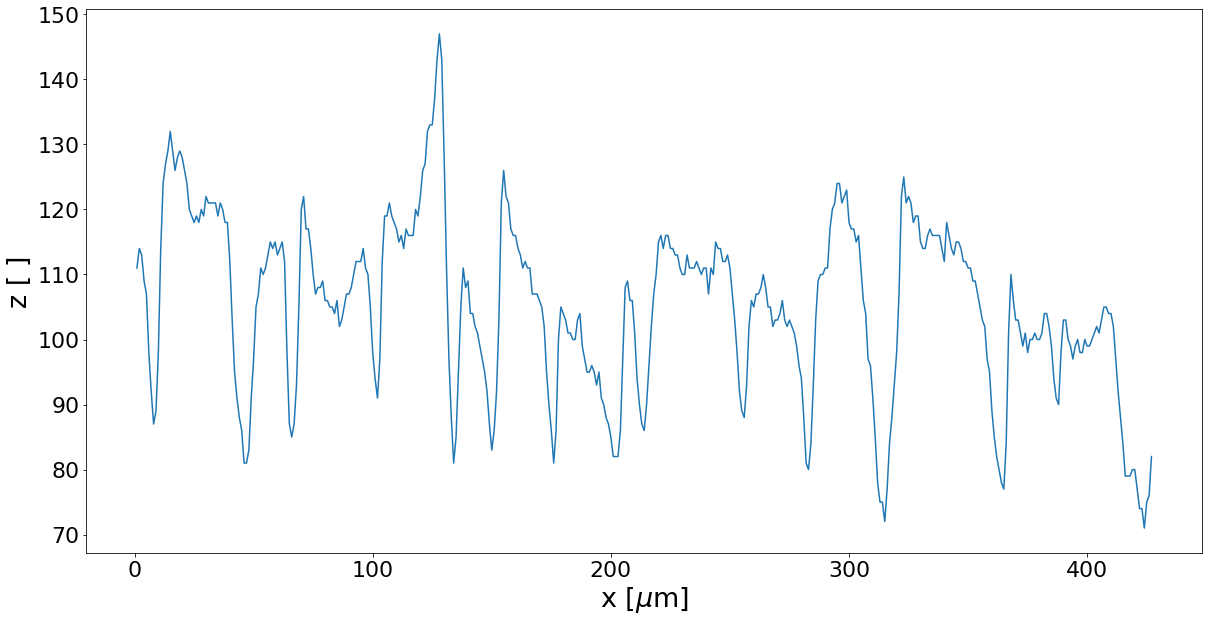

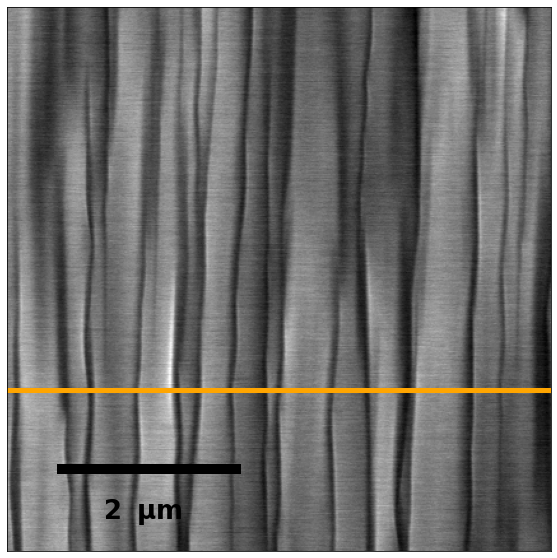

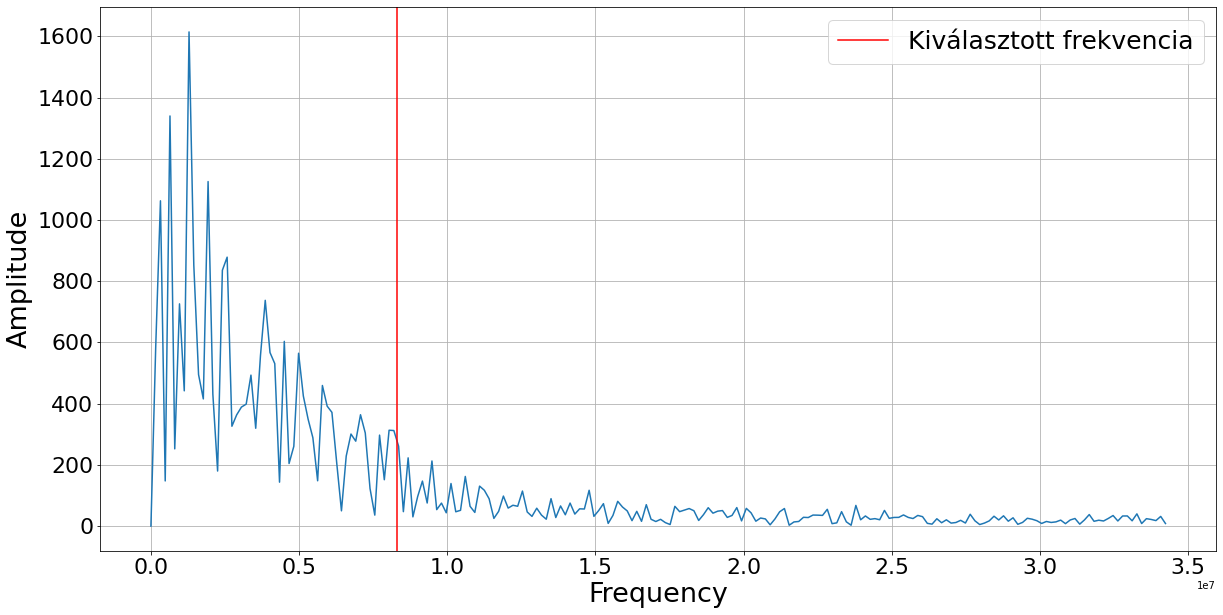

In [6]:
image = imageio.imread('../data/PD01_Cu_pillar/20220406/selected_data/70_30na5z.tif')
ticks.append(r'30 nA, $z = 5 \, \mu$m')
print(image.shape)

#plt.figure(figsize=(20,10))
#plt.imshow(image, cmap="gray")
PIXEL_SIZE = 1.45703e-008

freqs[0] = 8.3e6
analize_row(image, 300, PIXEL_SIZE, Afreq=freqs[0], name='70_30na5z', micron=2)

(400, 400)


0.20000000000000018

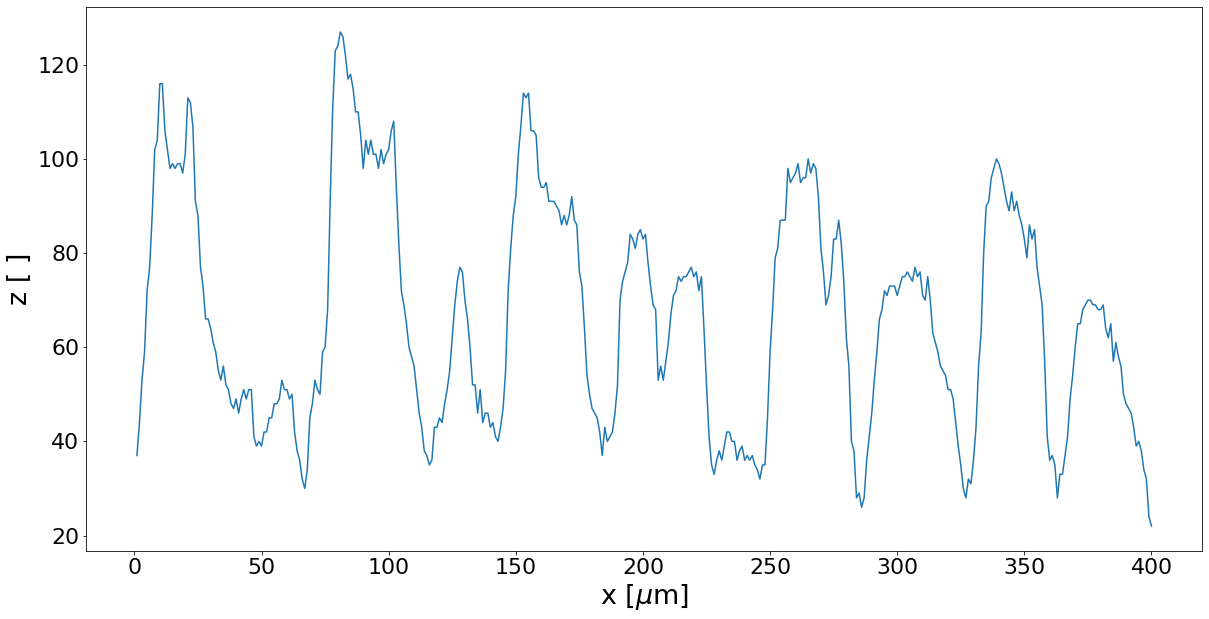

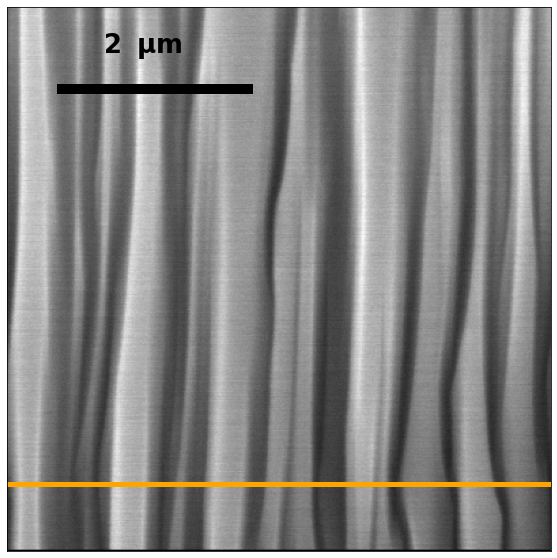

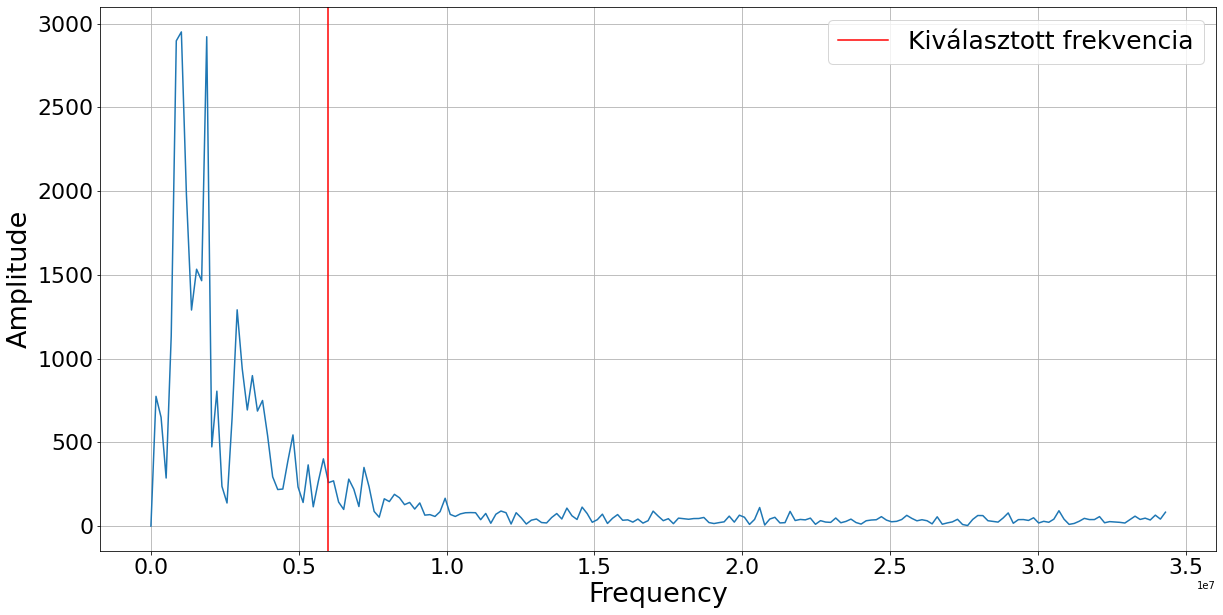

In [7]:
image = imageio.imread('../data/PD01_Cu_pillar/20220406/selected_data/78_30na5z.tif')
ticks.append(r'30 nA, $z = 5 \, \mu$m')
print(image.shape)

#plt.figure(figsize=(20,10))
#plt.imshow(image, cmap="gray")
PIXEL_SIZE = 1.45703e-008

freqs[1] = 6e6
analize_row(image, 350, PIXEL_SIZE, Afreq=freqs[1], name='78_30na5z', micron=2)

#analize_row(image, 351, PIXEL_SIZE, Afreq=6e6)
#analize_row(image, 329, PIXEL_SIZE, Afreq=6.2e6)
6.2 - 6

(433, 128)


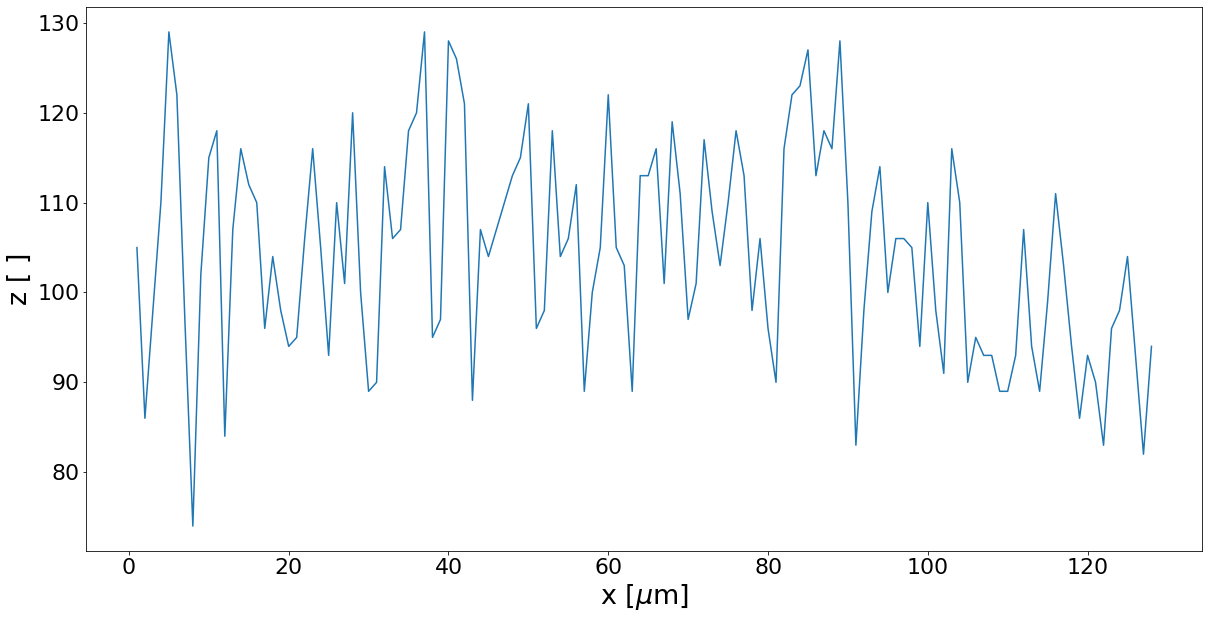

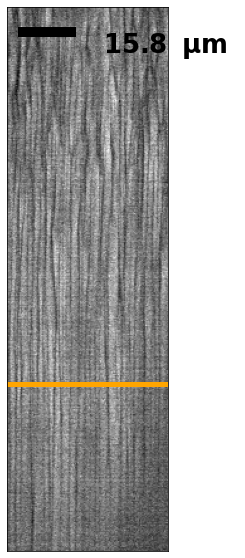

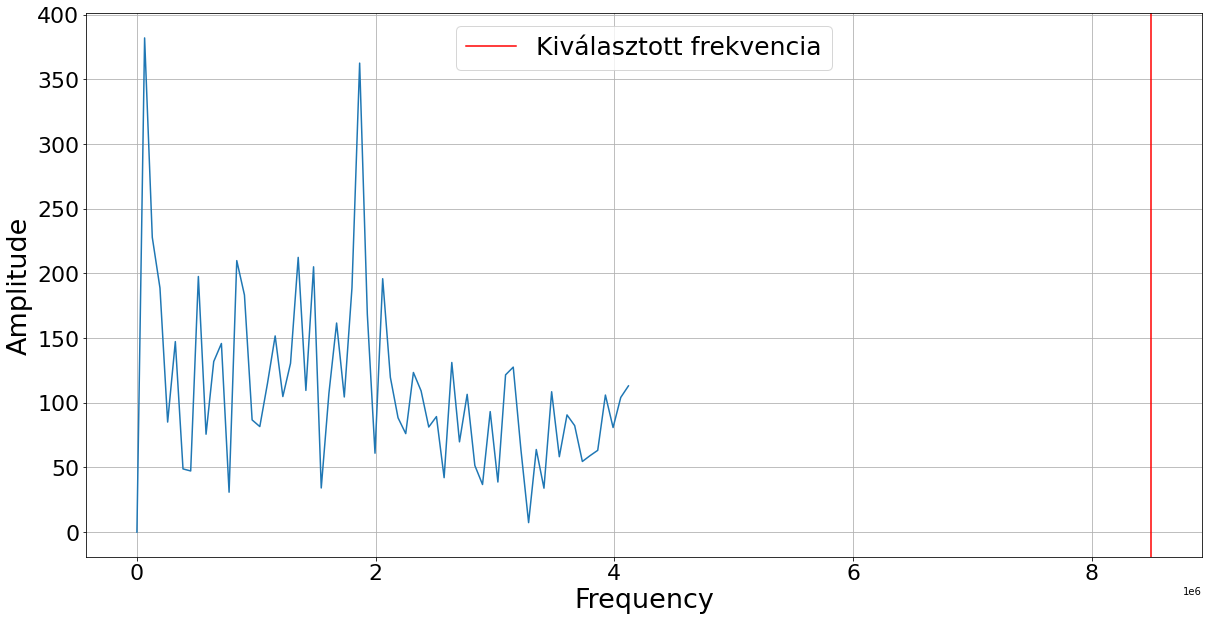

In [8]:
image = imageio.imread('../data/PD01_Cu_pillar/20220406/selected_data/84_deep_15na1z.tif')
ticks.append(r'15 nA, $z = 1 \, \mu$m')
print(image.shape)

#plt.figure(figsize=(20,10))
#plt.imshow(image, cmap="gray")
PIXEL_SIZE = 1.21419e-007

freqs[2] = 8.5e6
analize_row(image, 300, PIXEL_SIZE, Afreq=freqs[2])

(59, 59)


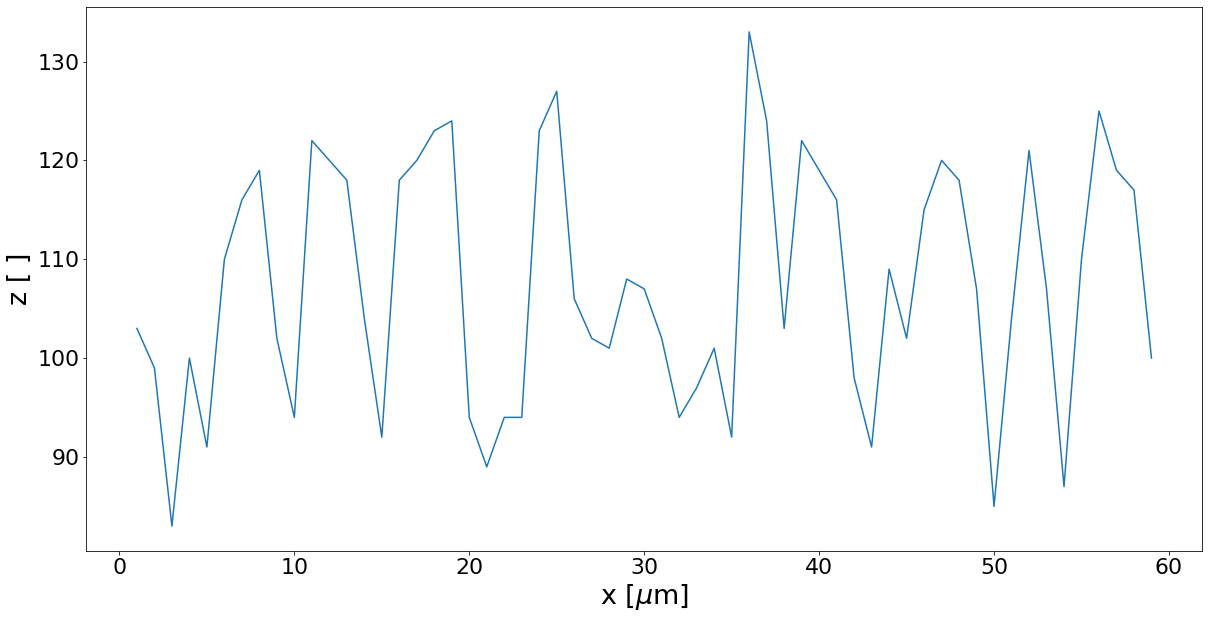

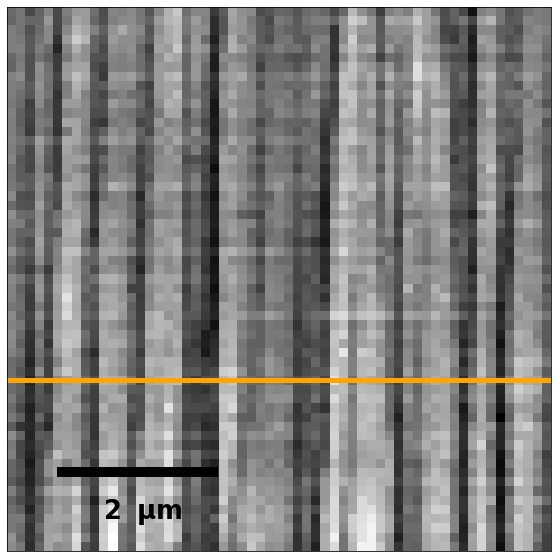

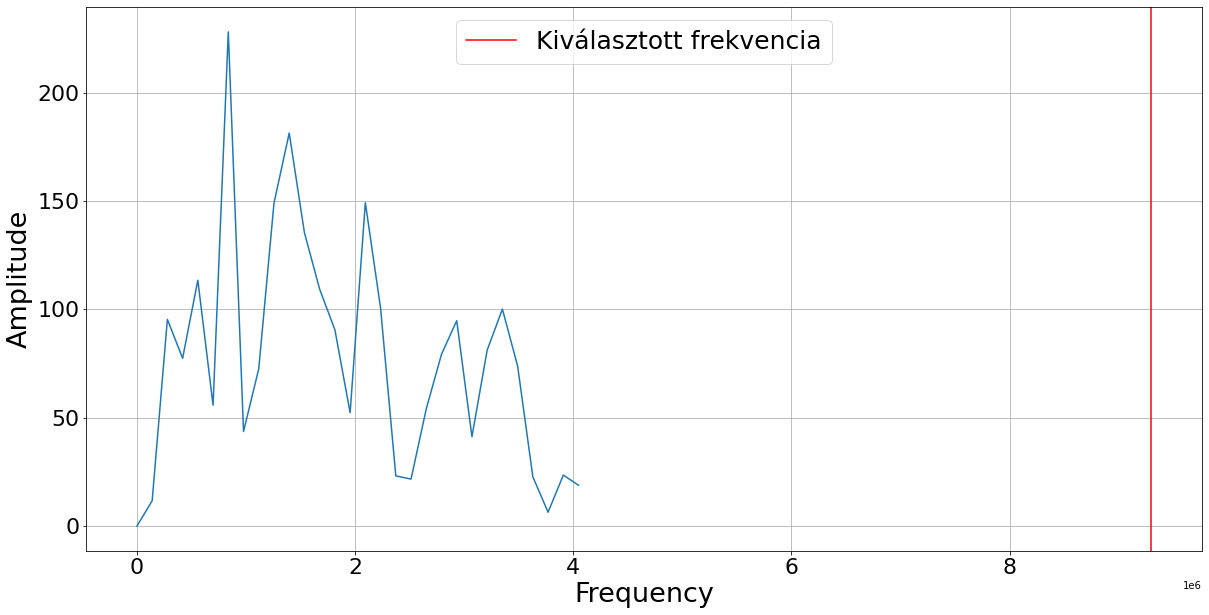

In [9]:
image = imageio.imread('../data/PD01_Cu_pillar/20220406/selected_data/85_15na0.8z.tif')
ticks.append(r'15 nA, $z = 0.8 \, \mu$m')
print(image.shape)

#plt.figure(figsize=(20,10))
#plt.imshow(image, cmap="gray")
PIXEL_SIZE = 1.21419e-007

freqs[3] = 9.3e6
analize_row(image, 40, PIXEL_SIZE, Afreq=freqs[3], name='85_15na0.8z', micron=2)

(73, 73)


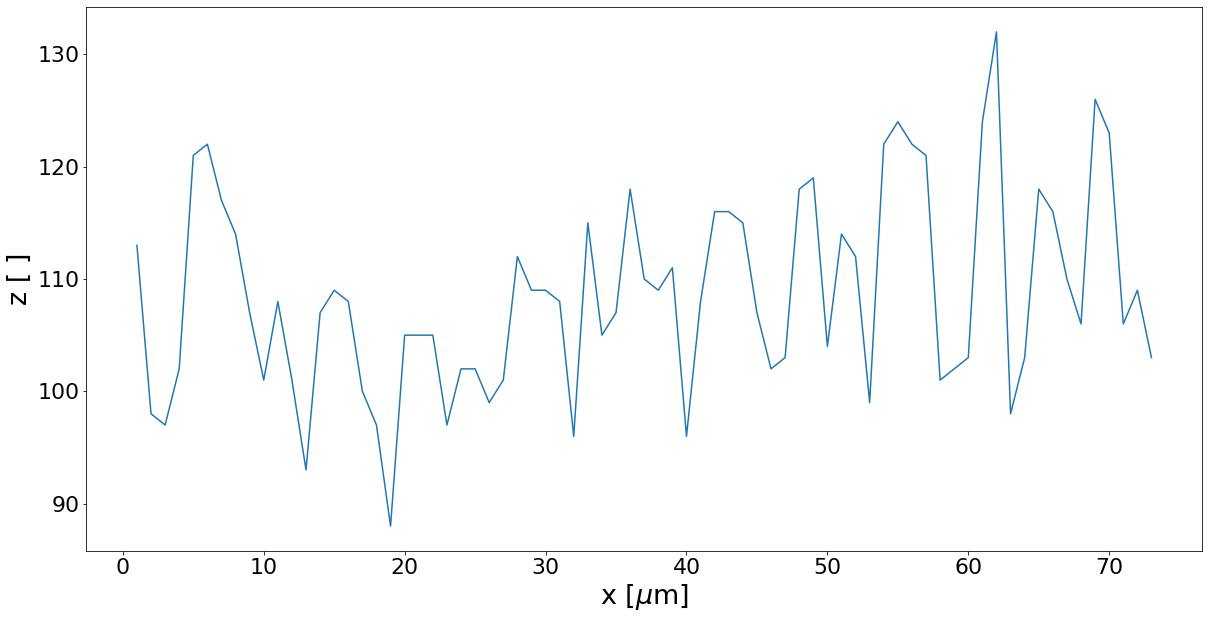

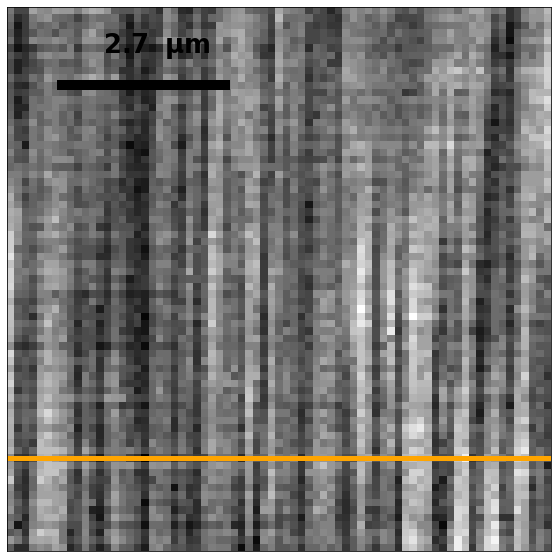

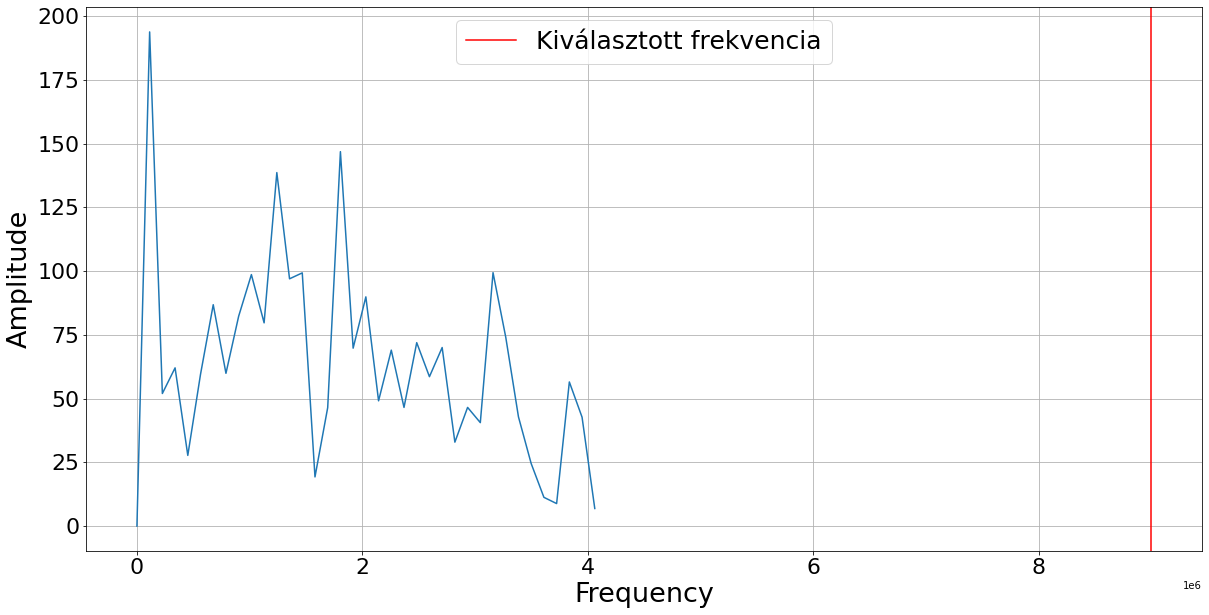

In [10]:
image = imageio.imread('../data/PD01_Cu_pillar/20220406/selected_data/86_15na1.5z.tif')
ticks.append(r'15 nA, $z = 1.5 \, \mu$m')
print(image.shape)

#plt.figure(figsize=(20,10))
#plt.imshow(image, cmap="gray")
PIXEL_SIZE = 1.21419e-007

freqs[4] = 0.9e7
analize_row(image, 60, PIXEL_SIZE, Afreq=freqs[4])

(46, 46)


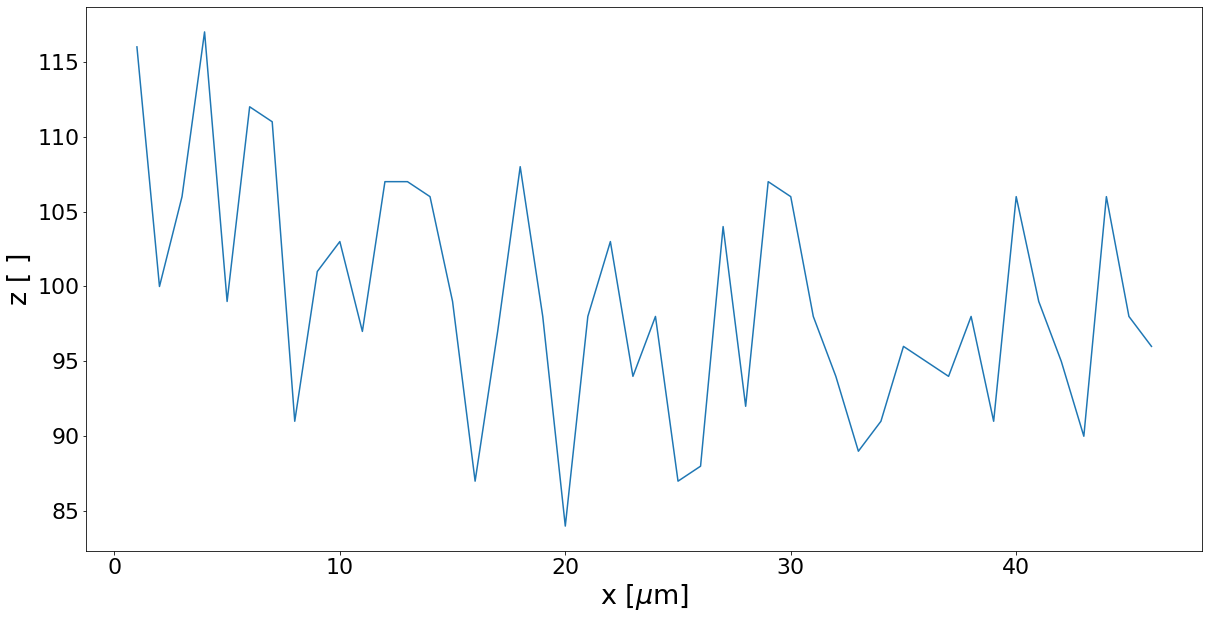

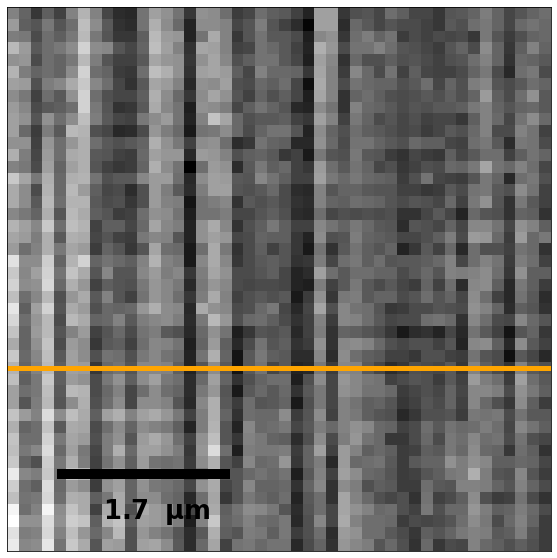

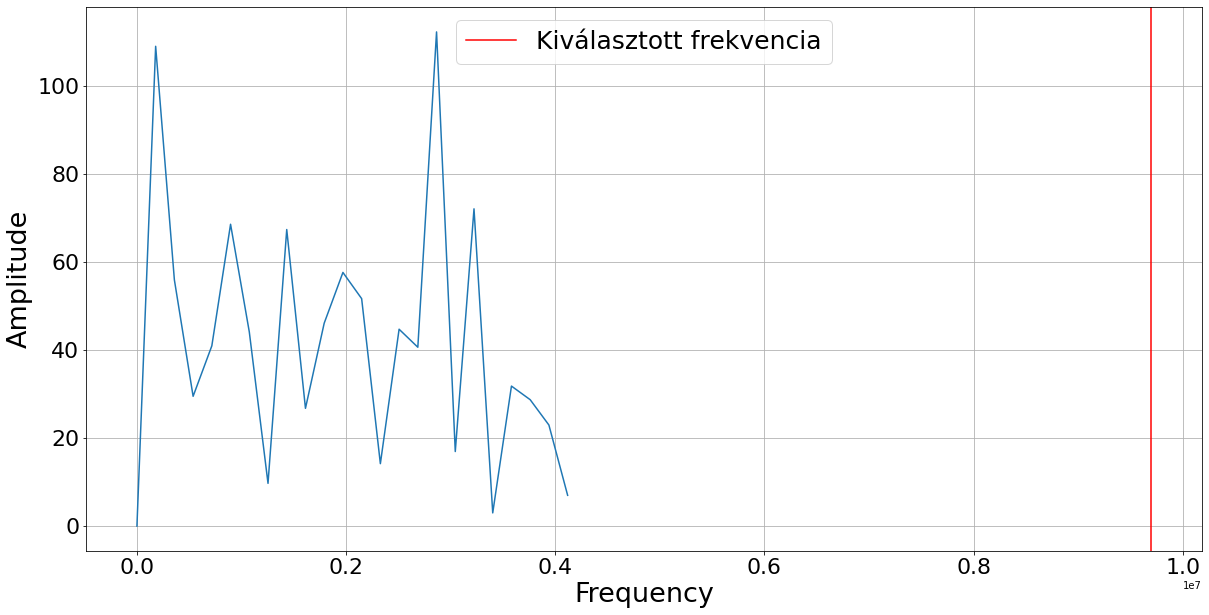

In [11]:
image = imageio.imread('../data/PD01_Cu_pillar/20220406/selected_data/90_15na10z.tif')
ticks.append(r'15 nA, $z = 10 \, \mu$m')
print(image.shape)

#plt.figure(figsize=(20,10))
#plt.imshow(image, cmap="gray")
PIXEL_SIZE = 1.21419e-007

freqs[5] = 0.97e7
analize_row(image, 30, PIXEL_SIZE, Afreq=freqs[5])

(44, 44)


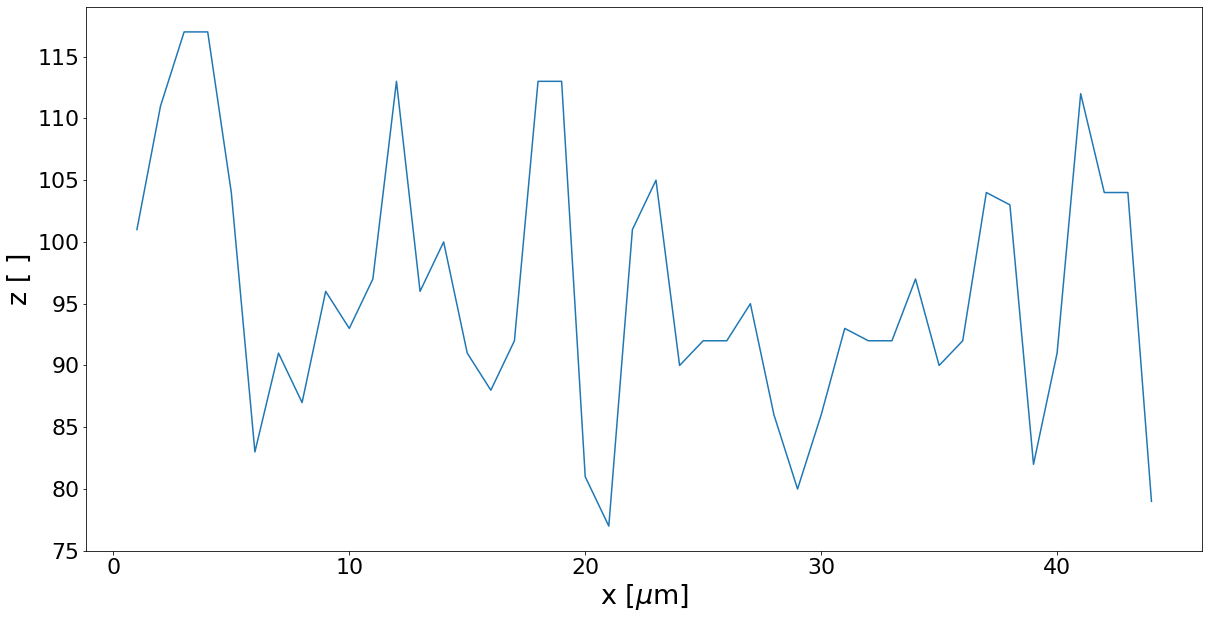

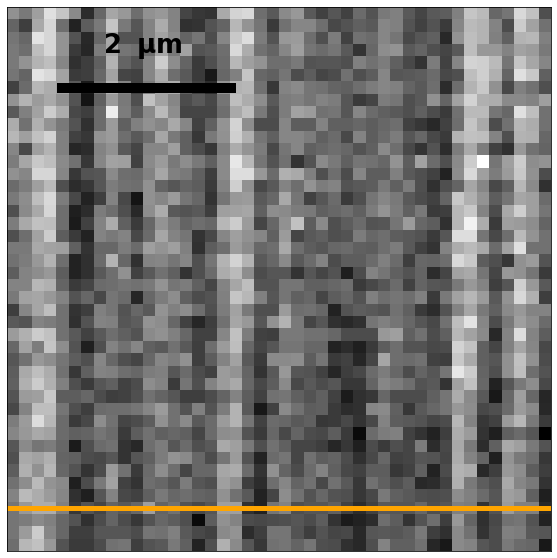

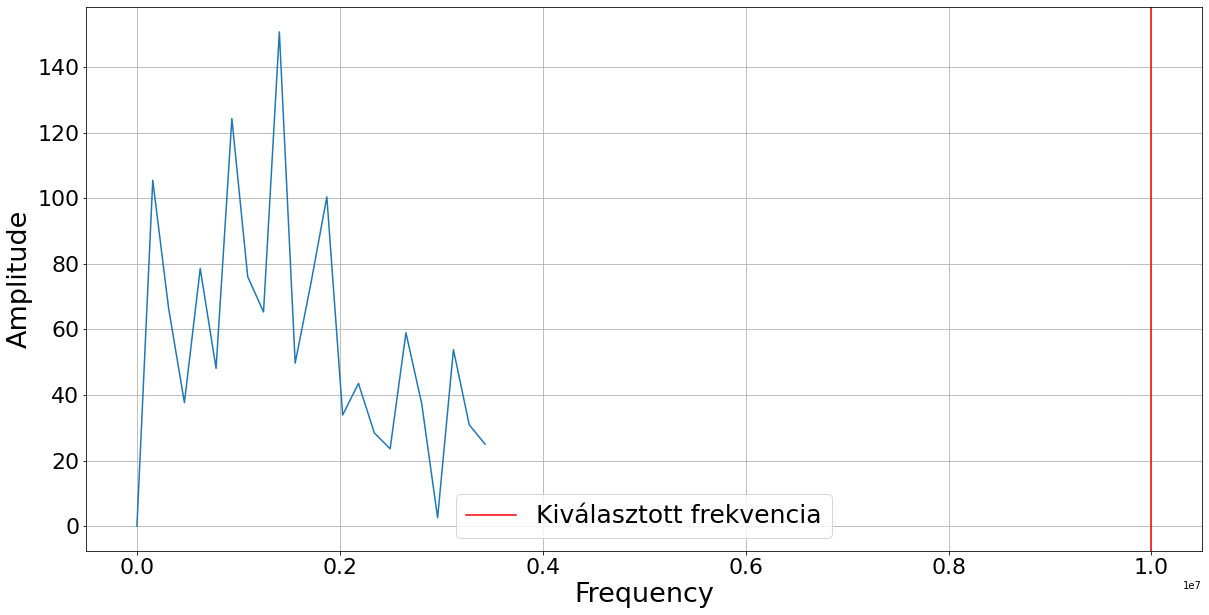

In [12]:
image = imageio.imread('../data/PD01_Cu_pillar/20220406/selected_data/91_3na1z.tif')
ticks.append(r'3 nA, $z = 1 \, \mu$m')

print(image.shape)

#plt.figure(figsize=(20,10))
#plt.imshow(image, cmap="gray")
PIXEL_SIZE = 1.45703e-007

freqs[6] = 1e7
analize_row(image, 40, PIXEL_SIZE, Afreq=freqs[6], name='91_3na1z', micron=2)

(73, 72)


0.010000000000000009

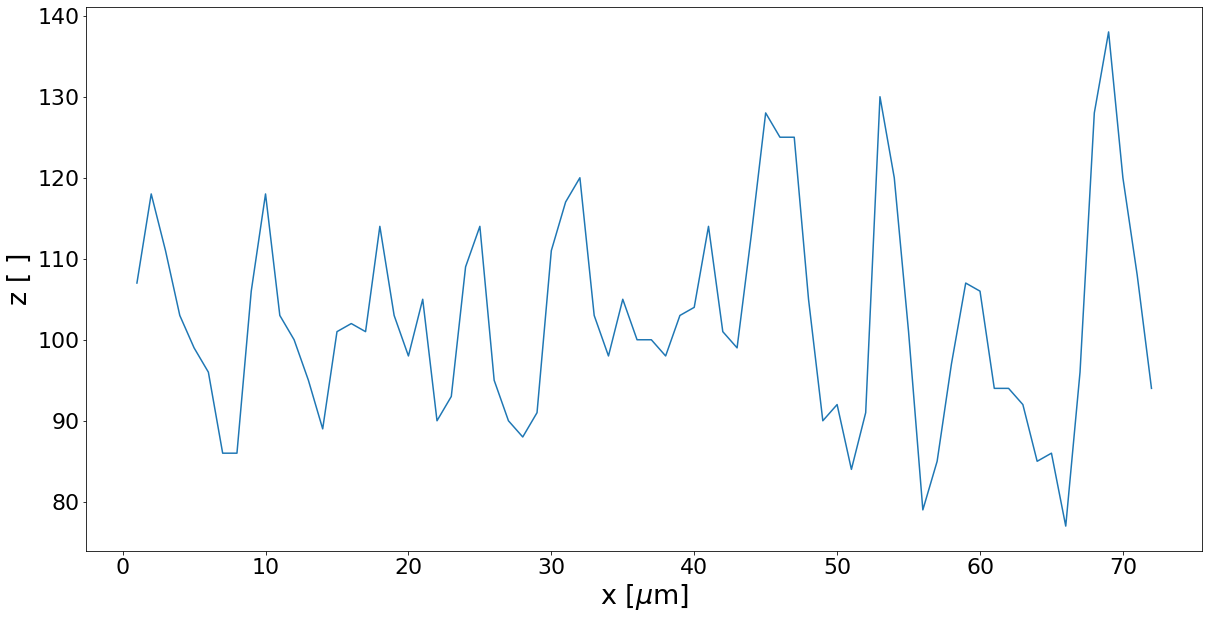

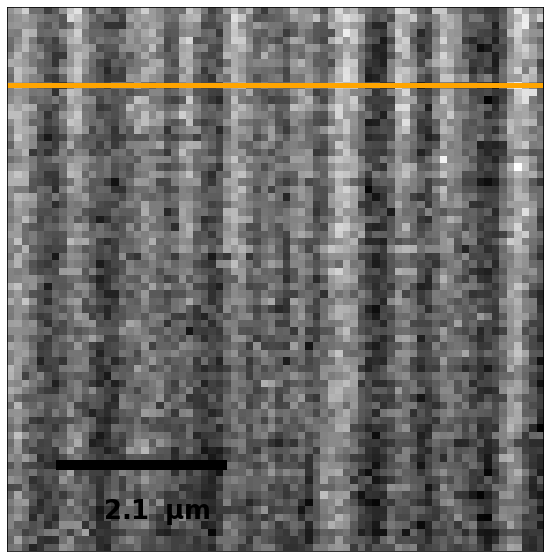

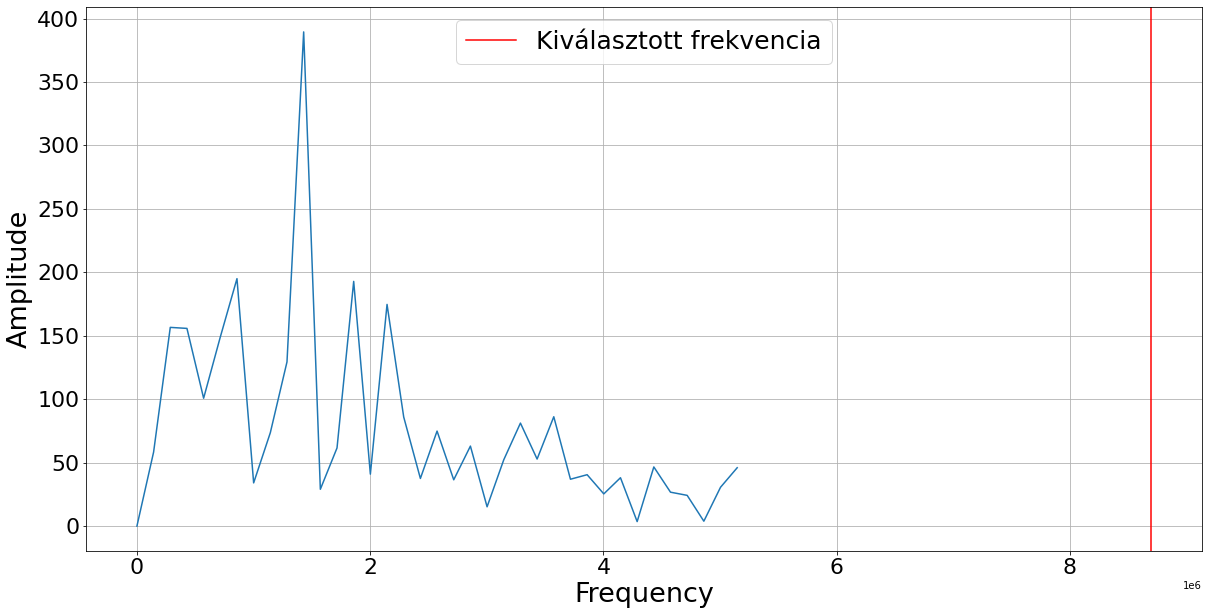

In [13]:
image = imageio.imread('../data/PD01_Cu_pillar/20220406/selected_data/92_0.3na2z.tif')
ticks.append(r'0.3 nA, $z = 2 \, \mu$m')
print(image.shape)

#plt.figure(figsize=(20,10))
#plt.imshow(image, cmap="gray")
PIXEL_SIZE = 9.71354e-008

freqs[7] = 0.87e7
analize_row(image, 10, PIXEL_SIZE, Afreq=freqs[7])

#analize_row(image, 9, PIXEL_SIZE, Afreq=0.86e7)
#analize_row(image, 11, PIXEL_SIZE, Afreq=0.86e7)
0.87 - 0.86

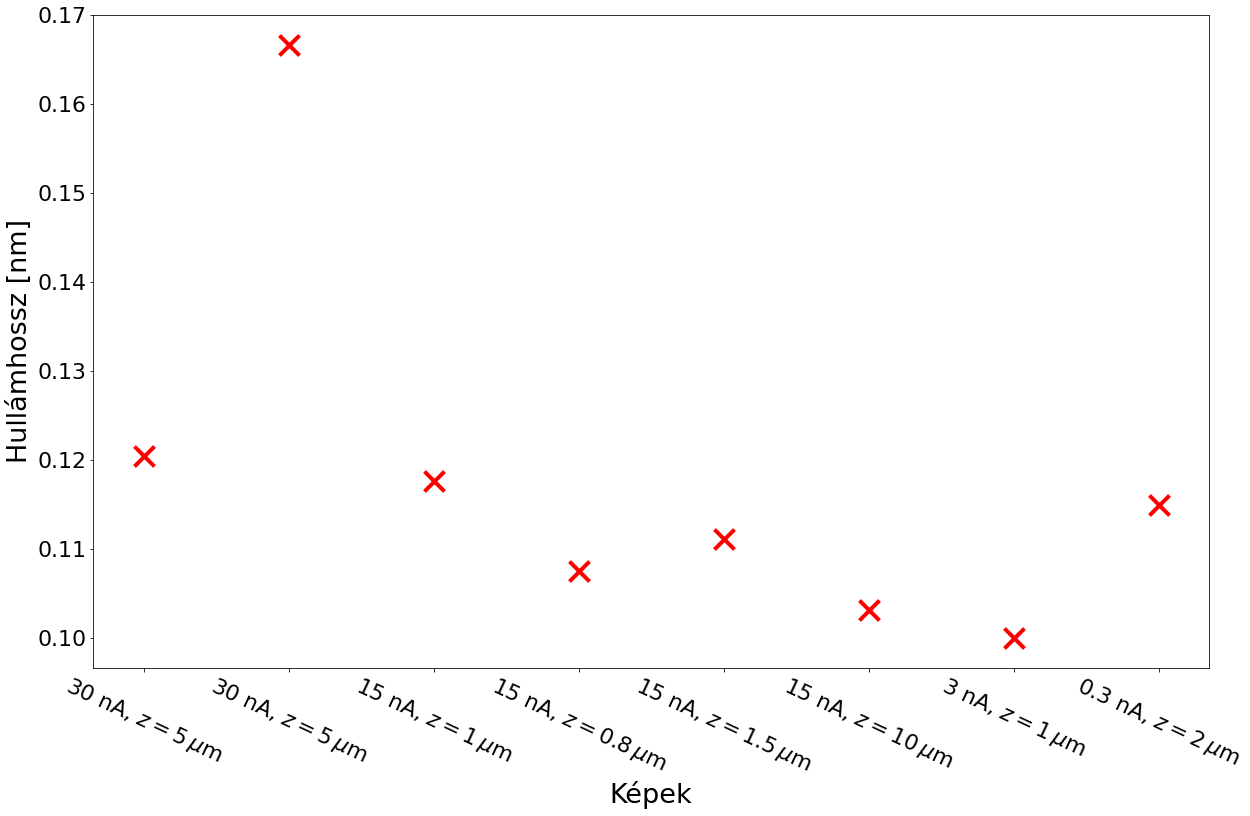

In [14]:
x = np.linspace(1,len(freqs),len(freqs))

plt.figure(figsize=(20,12))

plt.scatter(x,1/freqs * 1e6, marker="x", s=400, linewidth=4, color="red")

plt.xlabel("Képek", fontsize=27)
plt.ylabel("Hullámhossz [nm]", fontsize=27)
plt.xticks(x, labels=ticks, rotation=-25, fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.savefig("../latex/images/section6/kezeletlen_minta.png", dpi=300)
#2. hiba 0.2e-6
#utolsó hiba 1e-10